In [1]:
import networkx as nx
import math
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import det
from numpy import cov

In [2]:
data = sio.loadmat('Market.mat')['DI']
data.shape

(7, 190, 12)

In [3]:
#the nodes are the companies:
vertex_set = [i for i in range(12)]
G = nx.DiGraph()
for v in vertex_set:
    G.add_node(v)

In [4]:
all_nodes = set(vertex_set)

In [5]:
I = np.zeros((12,12))

In [6]:
T = 7
for i in vertex_set:
    for j in vertex_set:
        if i == j:
            continue
        else:
            s_x = {i}
            s_y = {j}
            s_z = all_nodes - s_x - s_y
            x_t = data[:,:,i]  #company i
            y_t = data[:,:,j]  #company j

            z_t = [] #remaining companies
            for k in s_z:
                z_t.append(data[:,:,k])
                
            z_t = np.asarray(z_t)
            
            k = 0
            for t in np.arange(2,T):
                if t == 1:
                    m1 = np.concatenate((y_t[1,:].reshape(-1,190),z_t[:,0,:].reshape(-1,190)))
                    m2 = np.concatenate( (x_t[0,:].reshape(-1,190) , np.concatenate((y_t[0,:].reshape(-1,190),z_t[:,0,:].reshape(-1,190)))) )
                    m3 = np.concatenate((y_t[0,:].reshape(-1,190),z_t[:,0,:].reshape(-1,190)))
                    m4 = np.concatenate( (x_t[0,:].reshape(-1,190) , np.concatenate((y_t[1,:].reshape(-1,190),z_t[:,0,:].reshape(-1,190)))) )
                    
                    c1 = cov(m1)
                    d1 = det(c1)

                    c2 = cov(m2)
                    d2 = det(c2)

                    c3 = cov(m3)
                    d3 = det(c3)

                    c4 = cov(m4)                
                    d4 = det(c4)
                else:
                    m1 = np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,190)))
                    m2 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,190)))) )
                    m3 = np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,190)))
                    m4 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,190)))) )

                    c1 = cov(m1)
                    d1 = det(c1)

                    c2 = cov(m2)
                    d2 = det(c2)

                    c3 = cov(m3)
                    d3 = det(c3)

                    c4 = cov(m4)                
                    d4 = det(c4)
                
                k += np.log( (d1 * d2) / (d3 * d4) )
                #print("DI of {} to {}".format(i,j),"t=",t,"k=",k)
                #print("d3=",d3,"d4=",d4,"d3 * d4=",d3*d4 )
            
            DI = 0.5 * k
            I[i,j] = DI
        

In [7]:
I

array([[0.        , 0.21446129, 0.17486153, 0.23875263, 0.4417295 ,
        0.46648449, 0.5654242 , 0.65589036, 0.48979577, 0.30631093,
        0.36049843, 0.15087625],
       [0.21792722, 0.        , 0.166417  , 0.30984478, 0.14951375,
        0.22867397, 0.05770887, 0.19937058, 0.17659097, 0.15280796,
        0.12097778, 0.09010245],
       [0.16697793, 0.28812927, 0.        , 0.14229406, 0.52548644,
        0.09718658, 0.19454128, 0.33300798, 0.19370615, 0.41370819,
        0.29075603, 0.21314792],
       [0.18362704, 0.15889817, 0.24891324, 0.        , 0.23008356,
        0.13567689, 0.23204426, 0.26690026, 0.27556891, 0.2057861 ,
        0.18361858, 0.26487436],
       [0.29662227, 0.22888443, 0.22585786, 0.32253817, 0.        ,
        0.25023913, 0.25084481, 0.24000607, 0.27646143, 0.30368316,
        0.32306604, 0.2001254 ],
       [0.31288903, 0.31904612, 0.14395927, 0.3053622 , 0.25811677,
        0.        , 0.18131607, 0.60344334, 0.17518052, 0.30102205,
        0.22253352,

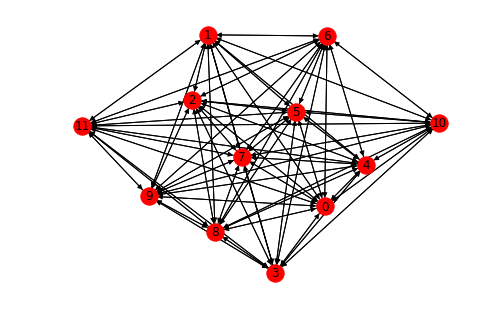

In [8]:
for i in vertex_set:
    for j in vertex_set:
        G.add_edge(i, j, weight = I[i,j])
nx.draw(G, with_labels = True)

In [9]:
#t=3
print(y_t[:3,:].shape,z_t[:,:2,:].reshape(-1,190).shape)
print(np.concatenate((y_t[:3,:],z_t[:,:2,:].reshape(-1,190))).shape)
m1 = np.concatenate((y_t[:3,:],z_t[:,:2,:].reshape(-1,190)))
c1 = cov(m1)
d1 = det(c1)
print(c1.shape)
print(d1)

(3, 190) (20, 190)
(23, 190)
(23, 23)
3.518462879577946e-52
